# MR reconstruction of fully sampled k-space data

This demonstration shows how to reconstruct MR images from fully sampled 
Cartesian k-space data.
Additional information on the MR raw data format is provided.

This demo is a 'script', i.e. intended to be run step by step in a
Python notebook such as Jupyter. It is organised in 'cells'. Jupyter displays these
cells nicely and allows you to run each cell on its own.

First version: 27th of May 2017  
Updated: 26nd of June 2021  
Author: Christoph Kolbitsch, Johannes Mayer

CCP SyneRBI Synergistic Image Reconstruction Framework (SIRF).  
Copyright 2015 - 2017 Rutherford Appleton Laboratory STFC.  
Copyright 2015 - 2017 University College London.  
Copyright 2015 - 2017, 2019, 2021 Physikalisch-Technische Bundesanstalt.

This is software developed for the Collaborative Computational
Project in Positron Emission Tomography and Magnetic Resonance imaging
(http://www.ccppetmr.ac.uk/).

SPDX-License-Identifier: Apache-2.0

### Fully Sampled Reconstruction
#### Goals of this notebook:
- Make sure everybody has a working version of SIRF.
- Achieve mastery in running Jupyter notebookes.
- Schematic knowledge of ISMRMRD format.
- Schematic knowledge of MR reconstruction with SIRF.
- Minimalistic introduction into Python.
- Reconstruct our first MR image.


### Synergistic Image Reconstruction Framework (SIRF) for MRI
Now to the question everybody has been asking themself: __[What is SIRF?](https://www.youtube.com/watch?v=HEXWRTEbj1I])__  
The __Synergistic Image Reconstruction Framework__ is:
- an open source reconstruction framework for PET-MR.
- has a Matlab and Python interface.
- coupled to the MR open source reconstruction engine '__The Gadgetron__' (a whole universe on its own).

Of course, nobody expects you to already know any of the functions and classes we will see today.
If you want to use SIRF there is a [software documentation](https://github.com/CCPPETMR/SIRF/wiki/Software-Documentation) where there is a complete list of what you want to know. More on this in a bit.


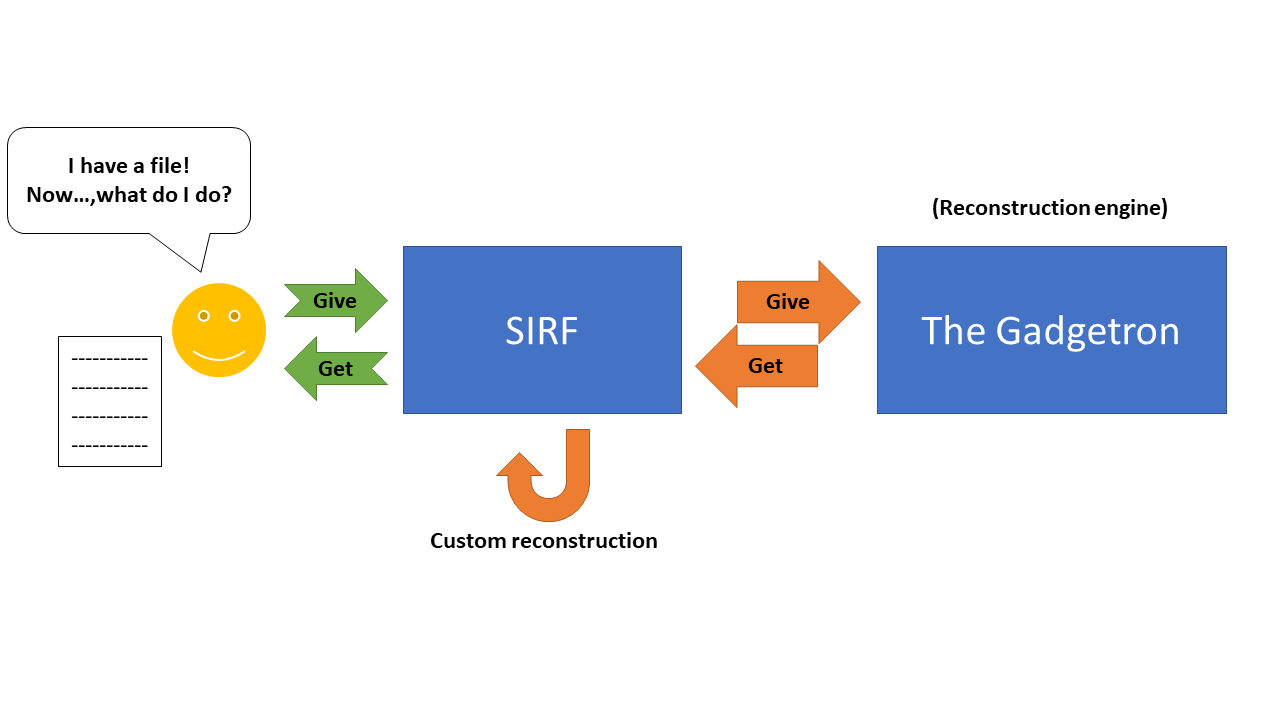

### Reasons to use an open-source reconstruction framework:
- be __independent__ of what your vendor provides as image output.
- __profit from__ the latest developments in the field which are often shared.
- __share data__ with others more easily.
- __others will continue to use your work!__


#### We will use SIRF to 
- send data to The Gadgetron and get reconstructions back.
- extract MRI data and process it on our own using SIRF functionality.

### Hence we need to start The Gadgetron!

If you are using Jupyter from a Docker service container, gadgetron is already running in the background and does not need starting. Please skip this step.

Open a new terminal. On Linux etc you can do this with `Ctrl + Alt + t`. If you use the jupyter notebook, use `New->terminal` from its home screen.
Type the word `gadgetron` and press enter.
Afterwards come back here to the notebook.


## ISMRM Raw Data (ISMRMRD) Format

MR raw- (or acquisition-) data is stored in a multitude of different data formats depending on the system vendor ( Siemens, GE, Philips, Bruker etc.). However, there is a community-supported, open-source magnetric resonance raw data or acquisition data format called "ISMRMRD" which carries the extension ".h5".

A wholesome explanation and introduction into the file format is provided on the [ISMRMRD website](http://ismrmrd.github.io/).

Of course to make the file format feasible, MR raw data formats from different vendors can be transformed to the ISMRMRD file format using siemens_to_ismrmrd, philips_to_ismrmrd or bruker_to_ismrmrd available on the [ISMRMRD Github]( https://github.com/ismrmrd/ ).



### ISMRMRD Schematic Overview 
#### Raw and Metadata
To have a self-contained acquisition data output from the scanner the files contain one data portion and one header portion.

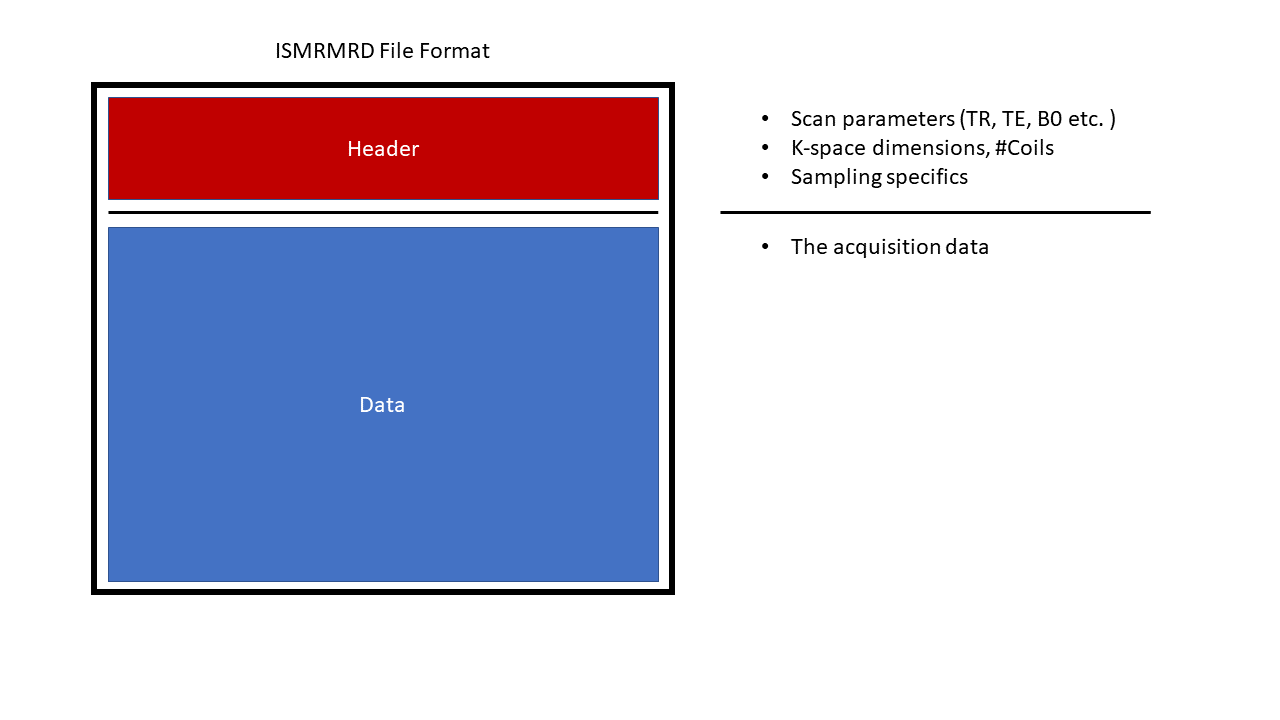
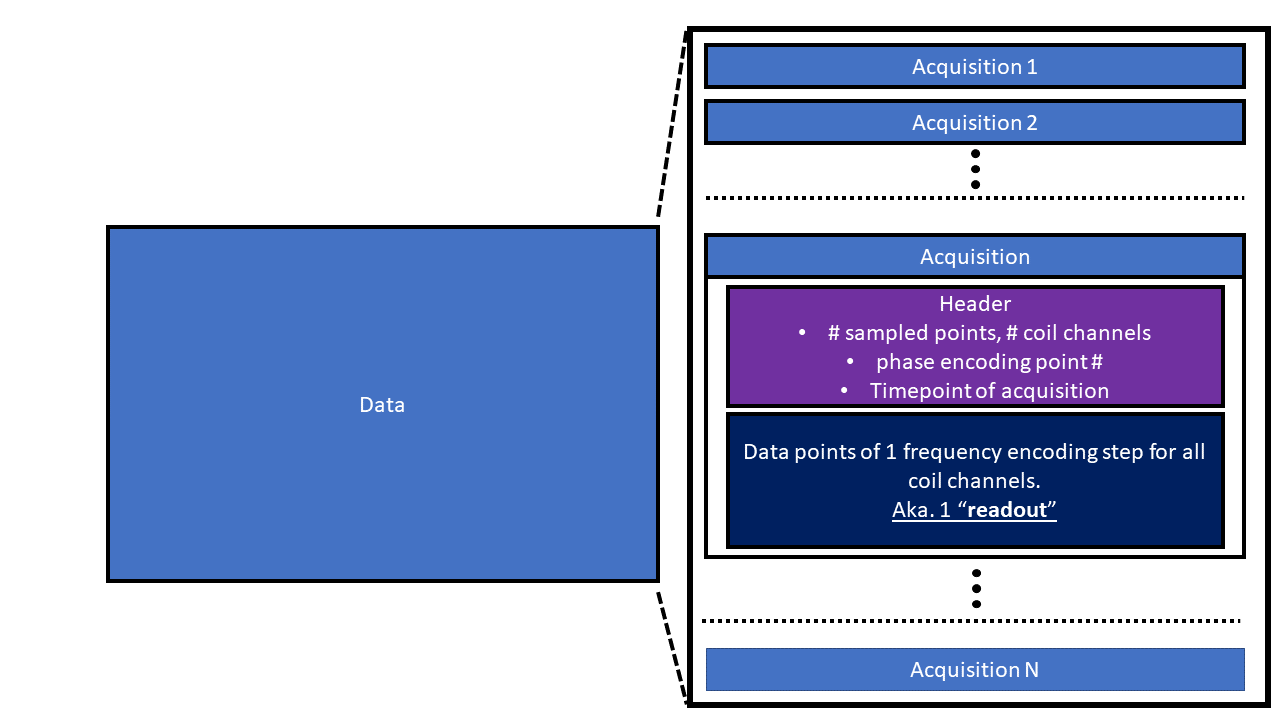

In [ ]:
%%bash 
# Run this script to make sure the data is downloaded.
bash ../../scripts/download_data.sh -m


In [ ]:
#%% make sure figures appears inline and animations works
%matplotlib widget

# Setup the working directory for the notebook
import notebook_setup
from sirf_exercises import cd_to_working_dir
cd_to_working_dir('MR', 'a_fully_sampled')

In [ ]:
__version__ = '0.1.0'

# import engine module
import sirf.Gadgetron as pMR
from sirf.Utilities import examples_data_path

# import further modules
import os
import matplotlib.pyplot as plt
from sirf_exercises import exercises_data_path

### A note on Python programming 

After the above `import` statement, the functionalities of the Synergistic Image Reconstruction Framework (SIRF) on the MR side are available in the package `sirf.Gadgetron` which in the code we will refer to as `pMR`. So whenever we want to call anything from this package we must preceed the call with `pMR.` (the dot is important).

In [ ]:
#%% LOAD RAW MR DATA
data_path = exercises_data_path('MR', 'PTB_ACRPhantom_GRAPPA')
filename = os.path.join(data_path, 'ptb_resolutionphantom_fully_ismrmrd.h5')
acq_data = pMR.AcquisitionData(filename)

print(type(acq_data))

### A second note on Python programming 

As you might be familiar with from other languages you can create objects in Python which cluster together data and functionality. This clustering is called a __class__ . 

In this case the object is a variable named `acq_data` and is of __class__ `AcquisitionData`. As you can see the prefix `pMR.` appears because `AcquisitionData` is defined in `pMR`.

The object `acq_data` is  generated by calling the __constructor__ of the class. The constructor is the name of the class itself. As you can see the constructor of `AcquisitionData` takes an argument, namely a string, which is the name of the .h5 file with the acquisition data. 

__Please remember this syntax you will need it later in small programming tasks.__

### Preprocessing MR Acquisition Data 

Prior to image reconstruction several pre-processing steps must be undertaken.  
These include
- asymmetric echo compensation
- noise decorrelation for multi-coil data
- removal of oversampling along frequency encoding ( also called "readout" or "kx" -direction).


In [ ]:
#%% PRE-PROCESSING CELL
# preprocessed_data = acq_data 
preprocessed_data = pMR.preprocess_acquisition_data(acq_data)

### Yet another note on Python programming 

As you can see, we now used a function call from the `pMR` package to act on the object we created before.
(Just as in many other programming languages) The syntax is of the form:
```python
output = function_name(argument)
```

In [ ]:
#%% SETUP MR RECONSTRUCTION
# create a reconstruction object using 2D inverse Fourier transform 
recon = pMR.FullySampledReconstructor()

#%% PASS RAW DATA TO RECONSTRUCTOR
recon.set_input(preprocessed_data)

### A last note on Python programming
The last two lines of code contained the syntax of how to call the functionality of an object.  
We see that a variable called `recon` is created and assigned the call to the constructor of the class `FullySampledReconstructor`. This constructor does not take any argument.  

Since classes cluster together data and the functionality of how to act on the data, this functionality must be accessible somehow. The functions which are associated to a class are called __methods__. 
You can call them by writing:
```python
output = variable_name.method_name(arguments)
```
The object `recon` possesses the __method__ `set_input` which takes as argument `AcquisitionData`. It does not return anything.  
__Please remember how to call methods of an object, you will need it later on.__


### Yeah, but now what?
We mentioned software documentation earlier. Since nobody knows what functionality these objects have we can call for help!

#### Programming exercise
Please write the following code in the next cell:
- Call the built-in `help()` function with the argument `recon` to view the documentation of `FullySampledReconstructor`.

Afterwards run the cell.

In [ ]:
# write your code here and run the cell


So now we see that there is a list of methods we can use. We used `set_input()` already. Since we already set the input we will use `process()` next.  

### Programming task
Please write code executing the following task:
- call the `process()` method of the variable `recon`.  
__Hint:__ Don't forget empty parentheses if you don't pass any arguments to signalize Python you are calling a function.

In [ ]:
# Write your code here and run the cell.
# It is just a one-liner!


In [ ]:
#%% SOLUTION CELL: DON'T VIEW UNLESS YOU TRIED!



































































# as promised just one single line.
# calling the method using the dot and empty parentheses since we don't supply arguments.
recon.process()


In [ ]:
#%% RETRIEVE AND VIEW IMAGE
image_data = recon.get_output()
image_array = abs(image_data.as_array())
image_array = image_array/image_array.max()

plt.figure(1)
plt.set_cmap('gray')
plt.imshow(image_array[0,:,:], vmin=0, vmax=0.7)
plt.title('Reconstructed image data (magnitude)') 

### Recap
#### We just learned how
- to run a Jupyter notebook.
- data is stored in the ISMRMRD format.
- to call Python functionality from the pMR (sirf.Gadgtetron) package.
- wrote our first lines of code! Bam!
- to reconstruct fully sampled MR kspace data using SIRF.
